In [14]:
# from https://github.com/HANTLUK/PauliDecomposition
import sys
sys.path.append("..")

import numpy as np
from qiskit.quantum_info import SparsePauliOp
import matplotlib.pyplot as plt
import time
import csv

from ThirdParty.TensorizedPauliDecomposition import PauliDecomposition
import Code.LSSVM as LSSVM
from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

In [8]:
def sparsePauliOeratorLCU(matrix):
	testResult2 = SparsePauliOp.from_operator(matrix)
	coeffs2 = testResult2.coeffs
	list2 = testResult2.paulis
	return [list2,coeffs2]

def tensorizedPauliDecompositionLCU(matrix):
	return PauliDecomposition(matrix)

def randomMatrix(dim):
	return np.add(np.random.rand(dim,dim),1.j*np.random.rand(dim,dim))

def comparison(method1, method2, matrix):
	start = time.time()
	list1,coeffs1 = method1(matrix)
	end = time.time()
	method1Time = end-start
	print (method1.__name__,"time:",method1Time, "coefLen", len(coeffs1))
	start = time.time()
	list2,coeffs2 = method2(matrix)
	end = time.time()
	method2Time = end-start
	print (method2.__name__,"time:",method2Time, "coefLen", len(coeffs2))
	equal = True
	for x,y in zip(list1,list2):
		if str(x) != str(y):
			equal = False
	eps = 10**(-5)
	for x,y in zip(coeffs1,coeffs2):
		if abs(complex(x) - complex(y)) > eps:
			equal = False
	return equal, method1Time, method2Time

In [9]:
tpdTimes, sparsePauliOpTimes = [],[]
qubits = 8

for i in range (1,qubits+1):
    print("qubits: ",i)
    testMatrix = randomMatrix(2**i)
    equal, method1, method2 = comparison(tensorizedPauliDecompositionLCU,sparsePauliOeratorLCU,testMatrix)
    print(equal)
    tpdTimes.append(method1)
    sparsePauliOpTimes.append(method2)

qubits:  1
tensorizedPauliDecompositionLCU time: 5.364418029785156e-05 coefLen 4
sparsePauliOeratorLCU time: 0.0008502006530761719 coefLen 4
True
qubits:  2
tensorizedPauliDecompositionLCU time: 0.0001239776611328125 coefLen 16
sparsePauliOeratorLCU time: 0.0018007755279541016 coefLen 16
True
qubits:  3
tensorizedPauliDecompositionLCU time: 0.00047016143798828125 coefLen 64
sparsePauliOeratorLCU time: 0.0038242340087890625 coefLen 64
True
qubits:  4
tensorizedPauliDecompositionLCU time: 0.002597808837890625 coefLen 256
sparsePauliOeratorLCU time: 0.012564420700073242 coefLen 256
True
qubits:  5
tensorizedPauliDecompositionLCU time: 0.008210897445678711 coefLen 1024
sparsePauliOeratorLCU time: 0.054448843002319336 coefLen 1024
True
qubits:  6
tensorizedPauliDecompositionLCU time: 0.024857044219970703 coefLen 4096
sparsePauliOeratorLCU time: 0.6813287734985352 coefLen 4096
True
qubits:  7
tensorizedPauliDecompositionLCU time: 0.12854599952697754 coefLen 16384
sparsePauliOeratorLCU time: 

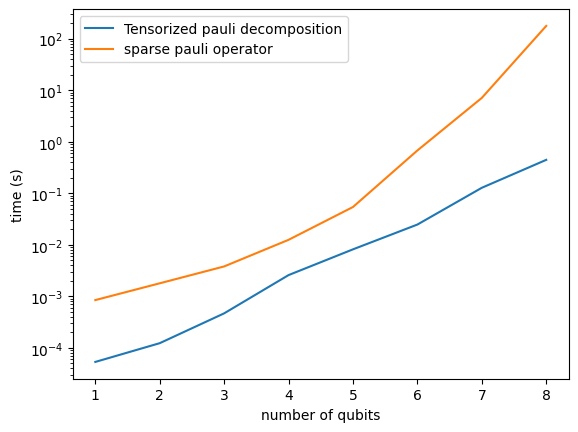

In [10]:
plt.plot(tpdTimes, label = "Tensorized pauli decomposition")
plt.plot(sparsePauliOpTimes, label = "sparse pauli operator")
plt.xlabel("number of qubits")
plt.ylabel("time (s)")
plt.yscale('log')
plt.xticks(np.arange(qubits),np.arange(1,qubits+1))
ax = plt.gca()
plt.legend()

In [11]:
with open('../SimulationResults/resultsLCU.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Number of qubits","Tensorized Pauli Decomposition", "Sparse Pauli Operator"])
    for i in range(qubits):
        writer.writerow([i+1,tpdTimes[i], sparsePauliOpTimes[i]])

In [12]:
classToFilterOut: int = 2
shots: int = 10000
gamma: float = 0.01 # regularization parameter
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)

In [15]:
tpdTimesOne = []
qubits = 8

for i in range (1,qubits+1):
    xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="breastCancer", subsetSize=2**i-1)
    input = LSSVM.lssvmMatrix(xTrain, gamma, "linearKernel")
    print("qubits: ",i)
    testMatrix = input
    start = time.time()
    list1,coeffs1 = tensorizedPauliDecompositionLCU(testMatrix)
    end = time.time()
    tpdTimesOne.append(end-start)
    print(tpdTimesOne[-1])
    print(len(coeffs1))

qubits:  1
8.606910705566406e-05
3
qubits:  2
0.00016808509826660156
10
qubits:  3
0.0005898475646972656
36
qubits:  4
0.002151966094970703
136
qubits:  5
0.00732111930847168
528
qubits:  6
0.025143146514892578
2080
qubits:  7
0.08614706993103027
8256
qubits:  8
0.3439671993255615
32896


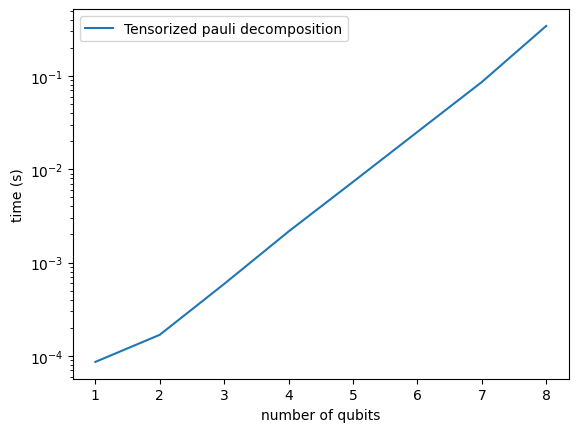

In [16]:
plt.plot(tpdTimesOne, label = "Tensorized pauli decomposition")
plt.xlabel("number of qubits")
plt.ylabel("time (s)")
plt.yscale('log')
plt.xticks(np.arange(qubits),np.arange(1,qubits+1))
ax = plt.gca()
plt.legend()